# Análisis Exploratorio de Datos (EDA)

## Objetivo
Caracterización del perfil de clientes que contactan la línea de atención mediante análisis descriptivo, correlaciones y pruebas estadísticas.

## Alcance
1. Análisis univariado de variables clave
2. Distribuciones y segmentaciones demográficas
3. Correlaciones entre variables numéricas
4. Análisis de la variable objetivo
5. Insights para modelamiento

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Configuración de gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Carga de Datos

In [2]:
# Cargar dataset maestro procesado
df = pd.read_csv('../data/procesada/master_dataset.csv')

print(f"Dimensiones: {df.shape}")
print(f"Registros: {df.shape[0]:,}")
print(f"Variables: {df.shape[1]}")

print(f"\nPrimeras filas:")
display(df.head())

print(f"\nTipos de datos:")
df.info()

Dimensiones: (1140532, 24)
Registros: 1,140,532
Variables: 24

Primeras filas:


,ID_Cuenta,Fecha_consulta,Tipo_consulta,Tipo_persona,Departamento,Tiene_plan_avanzado,Tipo_Plan,Es_moroso,Tiene_plus,Ha_caido_mora,Correo,usa_app,Forma_pago,Monto_adeudado,Edad,Estrato,Motivo_llamada,Duracion_llamada,Tiempo_en_espera,Transferencia_llamada,primera_llamada,Antiguedad,Recomienda_marca,y
0,340,2015-06-22 16:14:35,Actualización datos,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
1,340,2015-06-22 16:37:02,Agendamiento citas,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
2,340,2015-06-22 15:50:56,Agendamiento citas,soltero,Santafé de Bogotá,si,f,no,no,no,no,si,mensajero,16475.149938,36,NaN,m21,114.522845,15.663706,no,no,mid-age,no,0
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas,soltero,Santafé de Bogotá,no,f,no,si,si,si,no,mensajero,30167.091798,65,3,m17,124.262540,55.257504,no,no,new-new,si,0
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas,soltero,Santafé de Bogotá,no,f,no,si,no,no,si,tienda,11842.044402,30,2,m10,178.120444,4.635882,no,no,mid-age,si,0



Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140532 entries, 0 to 1140531
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID_Cuenta              1140532 non-null  object 
 1   Fecha_consulta         1140532 non-null  object 
 2   Tipo_consulta          1140532 non-null  object 
 3   Tipo_persona           1117580 non-null  object 
 4   Departamento           1140532 non-null  object 
 5   Tiene_plan_avanzado    1140532 non-null  object 
 6   Tipo_Plan              1027608 non-null  object 
 7   Es_moroso              1140532 non-null  object 
 8   Tiene_plus             1140532 non-null  object 
 9   Ha_caido_mora          1140532 non-null  object 
 10  Correo                 1140532 non-null  object 
 11  usa_app                1140532 non-null  object 
 12  Forma_pago             854928 non-null   object 
 13  Monto_adeudado         1140532 non-null  float64
 14  E

## 2. Análisis de la Variable Objetivo

Distribución y balance de la variable target 'y'.

Distribución de la variable objetivo (y):
y
0    854552
1    285980
Name: count, dtype: int64

Proporción:
y
0    0.749257
1    0.250743
Name: proportion, dtype: float64


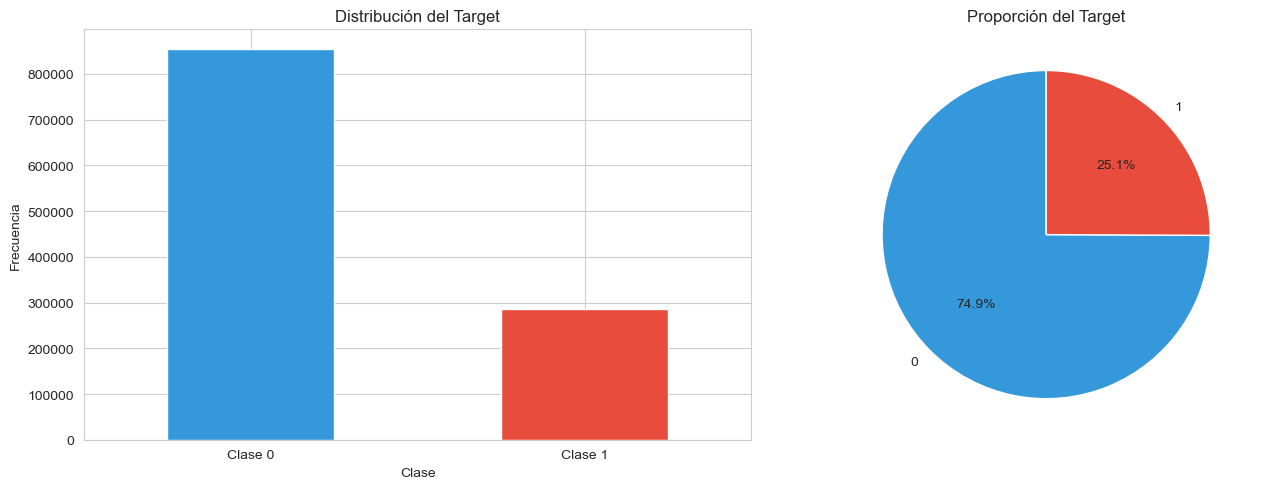


Ratio de desbalance: 2.99:1
Consideración: Aplicar técnicas de balanceo (class_weight, SMOTE) en modelamiento


In [3]:
# Distribución del target
print("Distribución de la variable objetivo (y):")
print(df['y'].value_counts())
print(f"\nProporción:")
print(df['y'].value_counts(normalize=True))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['y'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Distribución del Target')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['Clase 0', 'Clase 1'], rotation=0)

df['y'].value_counts(normalize=True).plot(
    kind='pie', 
    ax=axes[1], 
    autopct='%1.1f%%', 
    colors=['#3498db', '#e74c3c'],
    startangle=90
)
axes[1].set_title('Proporción del Target')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Análisis de desbalance
ratio = df['y'].value_counts()[0] / df['y'].value_counts()[1]
print(f"\nRatio de desbalance: {ratio:.2f}:1")
print(f"Consideración: Aplicar técnicas de balanceo (class_weight, SMOTE) en modelamiento")

## 3. Análisis de Variables Numéricas

Variables numéricas (4):
['Monto_adeudado', 'Edad', 'Duracion_llamada', 'Tiempo_en_espera']

Estadísticas descriptivas:


,Monto_adeudado,Edad,Duracion_llamada,Tiempo_en_espera
count,1.140532e+06,1.140532e+06,1.140532e+06,1.140532e+06
mean,1.990862e+04,4.847729e+01,1.989085e+02,2.391255e+01
std,1.414081e+04,1.786794e+01,1.410557e+02,1.694226e+01
min,3.015708e+01,1.800000e+01,1.602929e-01,2.663275e-02
25%,9.533535e+03,3.300000e+01,9.545149e+01,1.143818e+01
50%,1.663744e+04,4.800000e+01,1.663701e+02,2.007227e+01
75%,2.682283e+04,6.400000e+01,2.685886e+02,3.224388e+01
max,1.709877e+05,7.900000e+01,1.463228e+03,1.865452e+02


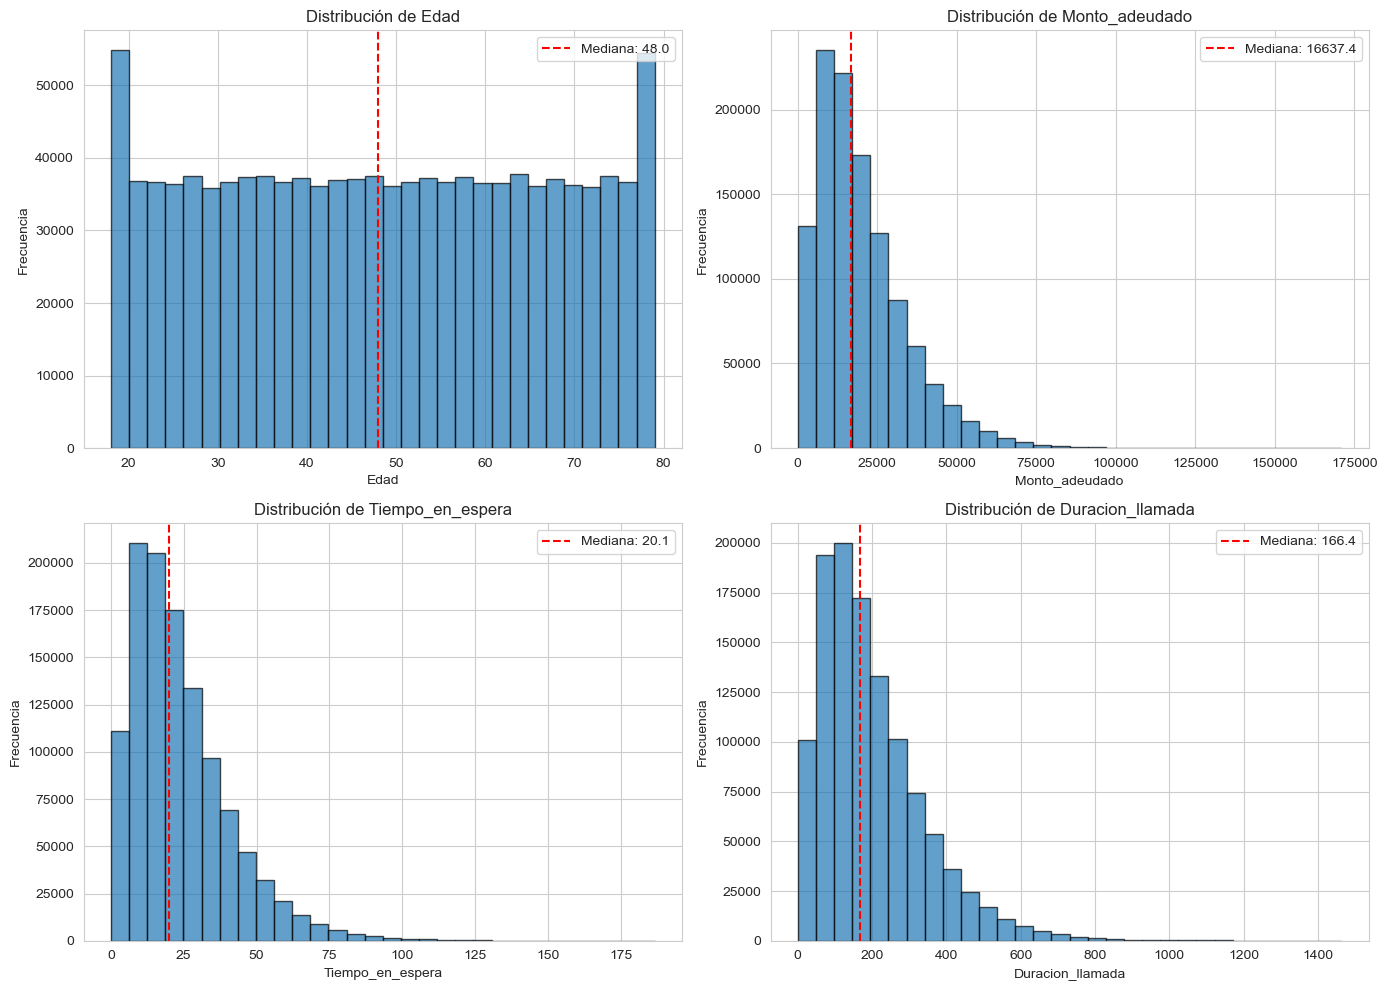

In [4]:
# Seleccionar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'y']  # Excluir target

print(f"Variables numéricas ({len(numeric_cols)}):")
print(numeric_cols)

# Estadísticas descriptivas
print(f"\nEstadísticas descriptivas:")
display(df[numeric_cols].describe())

# Distribuciones de variables clave
vars_clave = ['Edad', 'Monto_adeudado', 'Tiempo_en_espera', 'Duracion_llamada']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, var in enumerate(vars_clave):
    if var in df.columns:
        df[var].hist(bins=30, ax=axes[i], edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribución de {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frecuencia')
        axes[i].axvline(df[var].median(), color='red', linestyle='--', label=f'Mediana: {df[var].median():.1f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

## 4. Matriz de Correlación

Identificación de relaciones lineales entre variables numéricas.

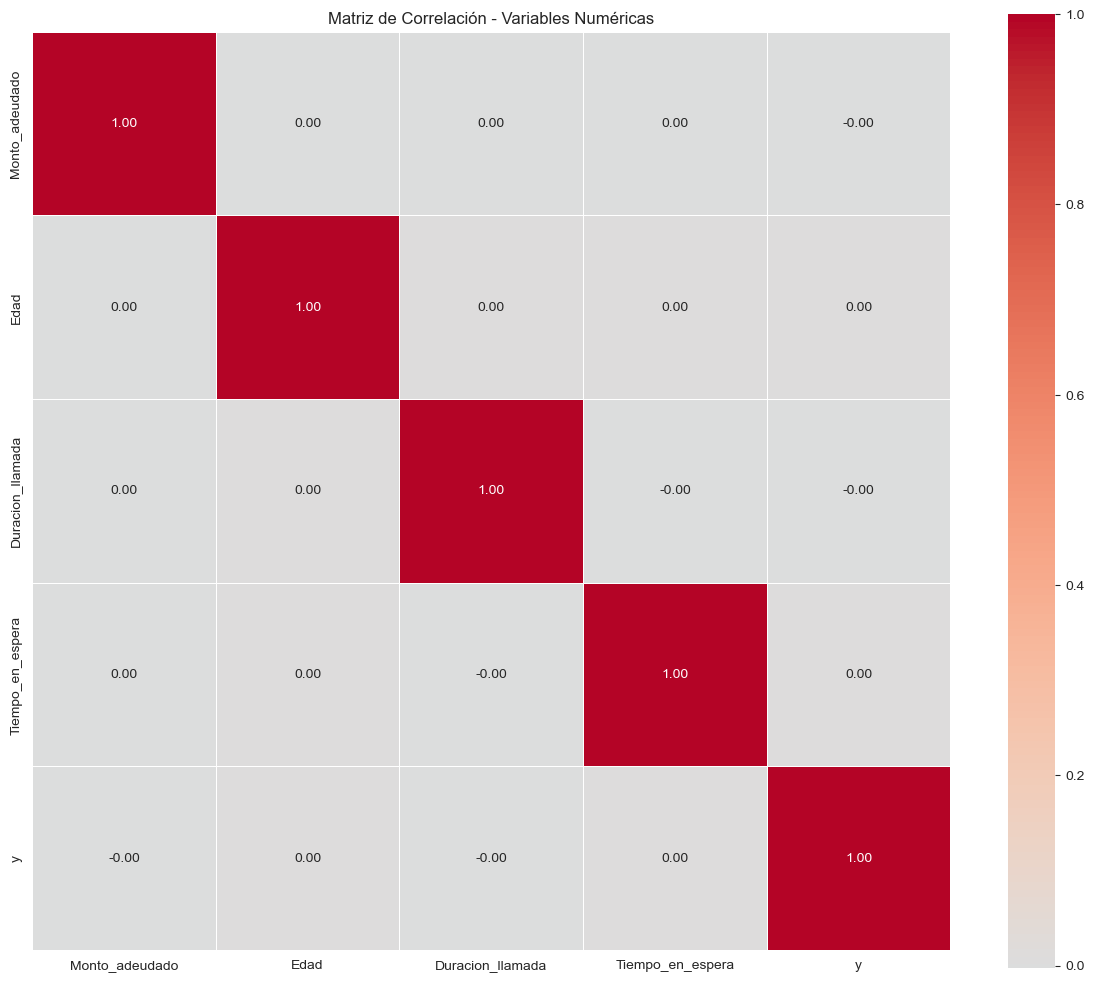

Correlaciones con variable objetivo (ordenadas por magnitud):
Edad                0.002312
Tiempo_en_espera    0.002143
Duracion_llamada   -0.001195
Monto_adeudado     -0.002379
Name: y, dtype: float64

Top 5 variables más correlacionadas con 'y':
Edad                0.002312
Tiempo_en_espera    0.002143
Duracion_llamada   -0.001195
Monto_adeudado     -0.002379
Name: y, dtype: float64


In [5]:
# Calcular correlaciones
correlation_matrix = df[numeric_cols + ['y']].corr()

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

# Correlaciones con el target
print("Correlaciones con variable objetivo (ordenadas por magnitud):")
target_corr = correlation_matrix['y'].drop('y').sort_values(ascending=False)
print(target_corr)

# Top variables correlacionadas
print(f"\nTop 5 variables más correlacionadas con 'y':")
print(target_corr.head())

## 5. Análisis de Variables Categóricas

Variables categóricas (19):
['ID_Cuenta', 'Fecha_consulta', 'Tipo_consulta', 'Tipo_persona', 'Departamento', 'Tiene_plan_avanzado', 'Tipo_Plan', 'Es_moroso', 'Tiene_plus', 'Ha_caido_mora', 'Correo', 'usa_app', 'Forma_pago', 'Estrato', 'Motivo_llamada', 'Transferencia_llamada', 'primera_llamada', 'Antiguedad', 'Recomienda_marca']

Cardinalidad de variables categóricas:
ID_Cuenta                     : 302984 categorías únicas
Fecha_consulta                : 577018 categorías únicas
Tipo_consulta                 :     5 categorías únicas
Tipo_persona                  :     8 categorías únicas
Departamento                  :    66 categorías únicas
Tiene_plan_avanzado           :     2 categorías únicas
Tipo_Plan                     :     7 categorías únicas
Es_moroso                     :     2 categorías únicas
Tiene_plus                    :     2 categorías únicas
Ha_caido_mora                 :     2 categorías únicas
Correo                        :     2 categorías únicas
usa_app    

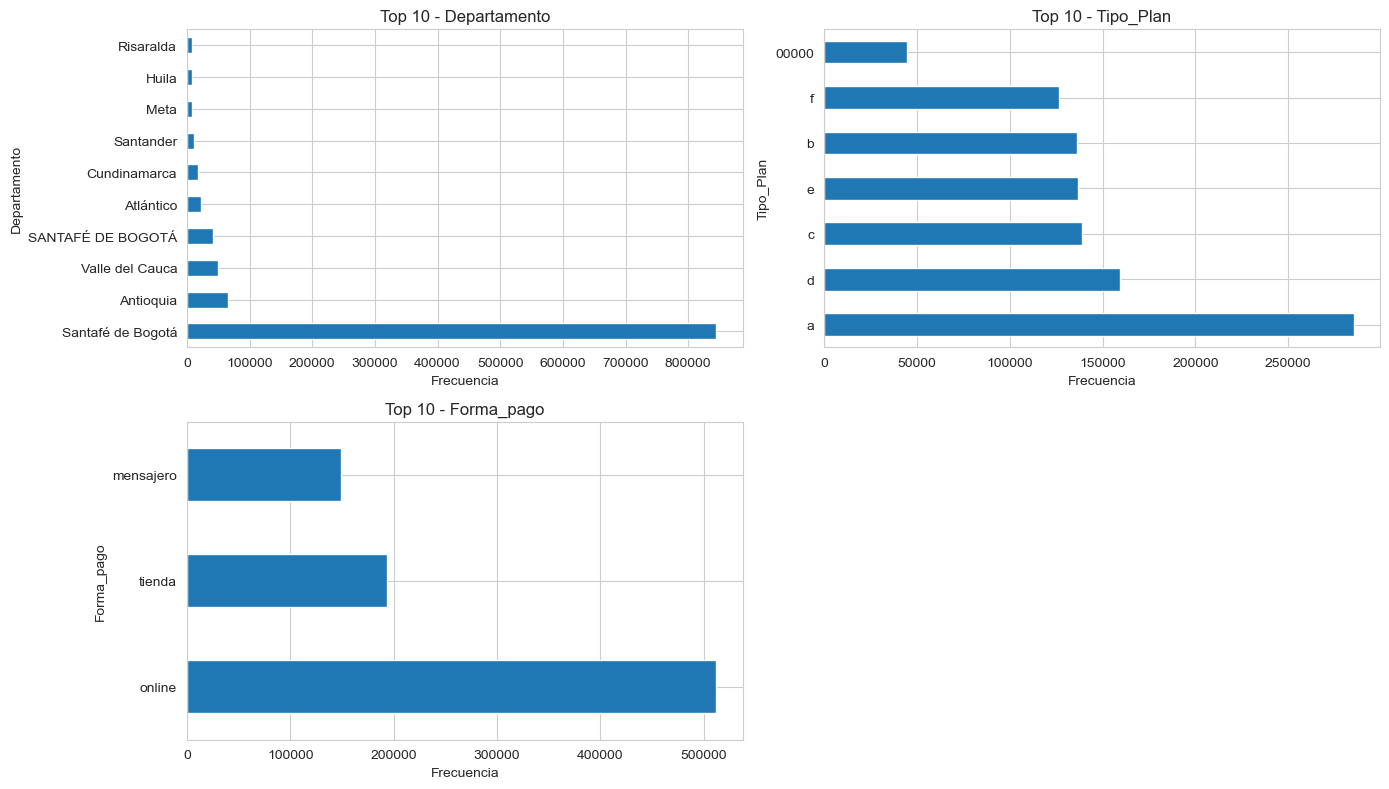

In [6]:
# Seleccionar variables categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Variables categóricas ({len(categorical_cols)}):")
print(categorical_cols)

# Análisis de cardinalidad
print(f"\nCardinalidad de variables categóricas:")
for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"{col:30s}: {n_unique:5d} categorías únicas")

# Distribución de variables clave
vars_cat_clave = ['Departamento', 'Tipo_Plan', 'Estado_Civil', 'Forma_pago']
vars_cat_disponibles = [v for v in vars_cat_clave if v in df.columns]

if len(vars_cat_disponibles) > 0:
    n_plots = len(vars_cat_disponibles)
    fig, axes = plt.subplots((n_plots + 1) // 2, 2, figsize=(14, 4 * ((n_plots + 1) // 2)))
    axes = axes.ravel() if n_plots > 1 else [axes]
    
    for i, var in enumerate(vars_cat_disponibles):
        top_10 = df[var].value_counts().head(10)
        top_10.plot(kind='barh', ax=axes[i])
        axes[i].set_title(f'Top 10 - {var}')
        axes[i].set_xlabel('Frecuencia')
    
    # Ocultar ejes sobrantes
    for i in range(len(vars_cat_disponibles), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

## 6. Análisis Bivariado: Target vs Variables Clave

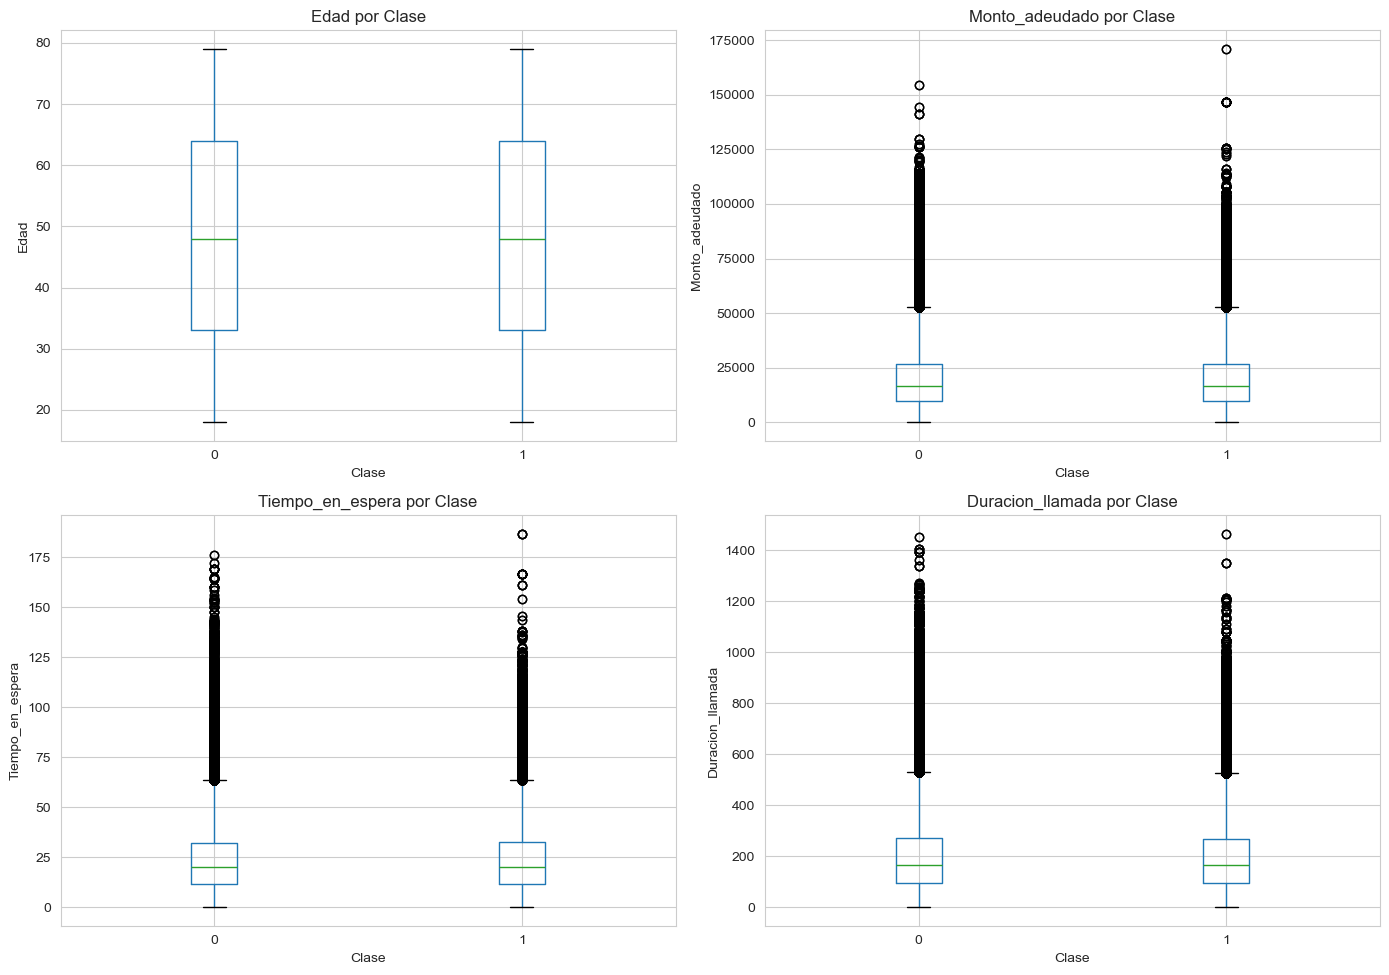


Estadísticas por clase del target:

Edad:
      count       mean        std   min   25%   50%   75%   max
y                                                              
0  854552.0  48.453395  17.873380  18.0  33.0  48.0  64.0  79.0
1  285980.0  48.548703  17.851514  18.0  33.0  48.0  64.0  79.0

Monto_adeudado:
      count          mean           std        min          25%           50%           75%            max
y                                                                                                         
0  854552.0  19928.079491  14168.696390  30.157082  9540.181406  16633.285585  26826.095341  154714.530611
1  285980.0  19850.472546  14057.033418  54.146256  9518.768296  16648.599653  26817.425241  170987.691261

Tiempo_en_espera:
      count       mean        std       min        25%        50%        75%         max
y                                                                                       
0  854552.0  23.891548  16.941248  0.026633  11.429931  20.

In [7]:
# Análisis de variables numéricas por clase del target
vars_analisis = ['Edad', 'Monto_adeudado', 'Tiempo_en_espera', 'Duracion_llamada']
vars_disponibles = [v for v in vars_analisis if v in df.columns]

if len(vars_disponibles) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    
    for i, var in enumerate(vars_disponibles[:4]):
        df.boxplot(column=var, by='y', ax=axes[i])
        axes[i].set_title(f'{var} por Clase')
        axes[i].set_xlabel('Clase')
        axes[i].set_ylabel(var)
    
    plt.suptitle('')  # Remover título automático
    plt.tight_layout()
    plt.show()
    
    # Estadísticas por grupo
    print(f"\nEstadísticas por clase del target:")
    for var in vars_disponibles:
        print(f"\n{var}:")
        print(df.groupby('y')[var].describe())

## 7. Pruebas de Hipótesis

Validación estadística de diferencias entre grupos.

In [8]:
# Test t de Student para variables numéricas
print("Pruebas t de Student (comparación de medias entre clases):")
print("H0: Las medias son iguales entre clase 0 y clase 1")
print("H1: Las medias son diferentes\n")

vars_test = ['Edad', 'Monto_adeudado', 'Tiempo_en_espera', 'Duracion_llamada']

resultados_test = []

for var in vars_test:
    if var in df.columns:
        clase_0 = df[df['y'] == 0][var].dropna()
        clase_1 = df[df['y'] == 1][var].dropna()
        
        t_stat, p_value = stats.ttest_ind(clase_0, clase_1)
        
        resultados_test.append({
            'Variable': var,
            'Media Clase 0': clase_0.mean(),
            'Media Clase 1': clase_1.mean(),
            't-statistic': t_stat,
            'p-value': p_value,
            'Significativa (α=0.05)': 'Sí' if p_value < 0.05 else 'No'
        })

df_test_results = pd.DataFrame(resultados_test)
display(df_test_results)

print(f"\nInterpretación:")
print(f"p-value < 0.05: Rechazamos H0, hay diferencia significativa entre grupos")
print(f"p-value >= 0.05: No rechazamos H0, no hay evidencia de diferencia")

Pruebas t de Student (comparación de medias entre clases):
H0: Las medias son iguales entre clase 0 y clase 1
H1: Las medias son diferentes



,Variable,Media Clase 0,Media Clase 1,t-statistic,p-value,Significativa (α=0.05)
0,Edad,48.453395,48.548703,-2.469083,0.013546,Sí
1,Monto_adeudado,19928.079491,19850.472546,2.540449,0.011071,Sí
2,Tiempo_en_espera,23.891548,23.975323,-2.288908,0.022085,Sí
3,Duracion_llamada,199.005984,198.617208,1.275829,0.202016,No



Interpretación:
p-value < 0.05: Rechazamos H0, hay diferencia significativa entre grupos
p-value >= 0.05: No rechazamos H0, no hay evidencia de diferencia


## 8. Detección de Outliers

In [9]:
# Método IQR para detección de outliers
print("Detección de outliers (método IQR):")

for var in vars_disponibles:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    
    print(f"\n{var}:")
    print(f"  Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers detectados: {len(outliers):,} ({(len(outliers)/len(df))*100:.2f}%)")

Detección de outliers (método IQR):

Edad:
  Rango normal: [-13.50, 110.50]
  Outliers detectados: 0 (0.00%)

Monto_adeudado:
  Rango normal: [-16400.41, 52756.77]
  Outliers detectados: 36,518 (3.20%)

Tiempo_en_espera:
  Rango normal: [-19.77, 63.45]
  Outliers detectados: 35,304 (3.10%)

Duracion_llamada:
  Rango normal: [-164.25, 528.29]
  Outliers detectados: 35,576 (3.12%)


## 9. Resumen de Hallazgos

### Balance del Target
- Ratio de desbalance identificado
- Recomendación de usar class_weight en modelos

### Variables Más Relevantes
- Identificadas mediante correlación con target
- Validadas con pruebas de hipótesis

### Calidad de Datos
- Outliers detectados en variables numéricas
- Considerar transformaciones o winsorización

### Próximos Pasos
1. Feature engineering basado en correlaciones
2. Tratamiento de outliers según contexto de negocio
3. Modelamiento con técnicas de balanceo